In [3]:
import pandas as pd
import os

In [4]:
def extract(data_dir:str,start_week:int, end_week:int,prefix:str) -> pd.DataFrame:
    df = pd.DataFrame()
    for i in range(start_week, end_week+1):
        i=str(i).zfill(3)
        file_path = os.path.join(data_dir, "batchs", f'{prefix}_week_{i}.csv')
        batch = pd.read_csv(file_path)
        df = pd.concat([df, batch], sort=True)
    return df

In [5]:
#Ici on sélectionne des semaines 2 à 20 pour le restaurant 1
df = extract("", 100, 110, 'restaurant_1')

In [6]:
df.head()

,Item Name,Order Date,Order Number,Product Price,Quantity,Total products
0,Mango Chutney,2016-11-30 17:42:00,3849,0.5,2,24
1,Onion Chutney,2016-11-30 17:42:00,3849,0.5,1,24
2,Red Sauce,2016-11-30 17:42:00,3849,0.5,1,24
3,Onion Chutney,2016-11-30 16:53:00,3847,0.5,1,5
4,Mint Sauce,2016-12-04 18:34:00,2279,0.5,1,8


In [11]:
#Cleaning our data
import numpy as np
def clean(df: pd.DataFrame) -> pd.DataFrame:
    df.columns=df.columns.str.lower().str.replace(' ', '_')
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['total_prix'] = df['product_price']*df['quantity']
    df['cash_in'] = df.groupby('order_number')['total_prix'].transform(np.sum)
    df = df.drop(columns=['item_name', 'quantity', 'product_price', 'total_products'])
    df = df.drop_duplicates()
    df=df.reset_index(drop=True)
    return df

#Resampling
def resample(df: pd.DataFrame) -> pd.DataFrame:
    df = df.resample('1H', on='order_date').sum().reset_index()
    return df

#Merge
def merge (df: pd.DataFrame , df2:pd.DataFrame)

SyntaxError: invalid syntax (403972347.py, line 19)

In [8]:
df = clean(df)
df.head()

NameError: name 'clean' is not defined

In [9]:
#cash_in par jour
df2 = df.groupby(df.order_date.dt.date).sum()
df2

AttributeError: 'DataFrame' object has no attribute 'order_date'

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df2.cash_in)

In [10]:
#cash_in par semaine
df3 = df2
df3["order_date"] = df3.index
df3['order_date'] = pd.to_datetime(df3['order_date'])
df3["Week"] = df3["order_date"].dt.to_period("W").dt.to_timestamp()
df3

NameError: name 'df2' is not defined

In [77]:
df3 = df3.groupby(df3.Week.dt.date).sum()
df3

C:\Users\saune\AppData\Local\Temp\ipykernel_12956\1227719461.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df3.groupby(df3.Week.dt.date).sum()


,order_number,total_prix,cash_in
Week,,,
2016-11-28,346807,624.95,4923.80
2016-12-05,712011,1348.20,10065.10
2016-12-12,1262932,1959.30,16718.90
2016-12-19,1108614,1659.30,11073.80
2016-12-26,1236705,1714.50,12220.35
2017-01-02,1722122,1908.15,11967.55
2017-01-09,2048303,2385.60,14635.55
2017-01-16,1088576,1625.30,10442.10
2017-01-23,1491078,1959.70,12530.45


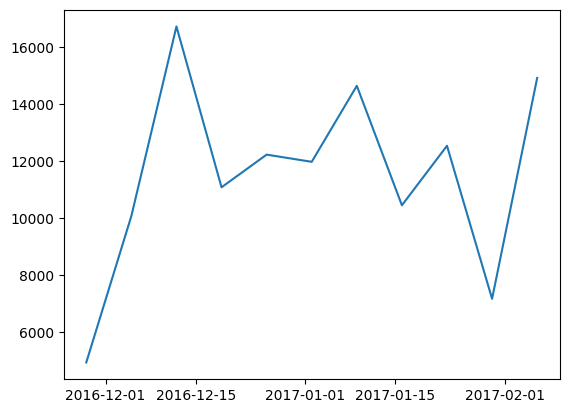

In [78]:
import matplotlib.pyplot as plt
plt.plot(df3.cash_in)

In [ ]:
import os
import logging

import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.plot(df3.order_date, df3.cash_in)
plt.xlabel("time")
plt.ylabel("turnover")
plt.grid(True)

NameError: name 'df3' is not defined

<Figure size 1000x500 with 0 Axes>